

<div style="border:solid green 2px; padding: 20px"> <h1 style="color:green; margin-bottom:20px">Комментарий наставника</h1>

Привет! Спасибо, что сдала задание:) Ты проделала большую работу. Далее в файле мои комментарии ты сможешь найти в ячейках, аналогичных данной ( если рамки комментария зелёные - всё сделано правильно; жёлтые - есть замечания, но не критично; красные - нужно переделать). Не удаляй эти комментарии и постарайся учесть их в ходе выполнения проекта. 

</div>

# Исследование объявлений о продаже квартир

В вашем распоряжении данные сервиса Яндекс.Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктов за несколько лет. Нужно научиться определять рыночную стоимость объектов недвижимости. Ваша задача — установить параметры. Это позволит построить автоматизированную систему: она отследит аномалии и мошенническую деятельность. 

По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые — получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта, ближайшего парка и водоёма. 

### Шаг 1. Откройте файл с данными и изучите общую информацию. 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.0,2019-03-07T00:00:00,3,2.70,16.0,51.0,8,NaN,...,25.0,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.4,2018-12-04T00:00:00,1,NaN,11.0,18.6,1,NaN,...,11.0,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.0,2015-08-20T00:00:00,2,NaN,5.0,34.3,4,NaN,...,8.3,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.0,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.0,2018-06-19T00:00:00,2,3.03,14.0,32.0,13,NaN,...,41.0,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
total_images            23699 non-null int64
last_price              23699 non-null float64
total_area              23699 non-null float64
first_day_exposition    23699 non-null object
rooms                   23699 non-null int64
ceiling_height          14504 non-null float64
floors_total            23613 non-null float64
living_area             21796 non-null float64
floor                   23699 non-null int64
is_apartment            2775 non-null object
studio                  23699 non-null bool
open_plan               23699 non-null bool
kitchen_area            21421 non-null float64
balcony                 12180 non-null float64
locality_name           23650 non-null object
airports_nearest        18157 non-null float64
cityCenters_nearest     18180 non-null float64
parks_around3000        18181 non-null float64
parks_nearest           8079 non-null float64
ponds_around300

### Вывод

У нас есть большая таблица с данными по недвижимости - 23699 строк. Не по всем столбцам данные полные. Есть много столбцов с типом данных  float64 - которые по возможности будем переводить в int64. Так же есть 2 столбца с типом данных bool. Так же в этот тип надо перевести столбец is_apartment. Мы видим, что в основном общие данные по квартире заполнены - это общая и жилая площадь, площадь кухни и этаж.Так же мы у всех знаем цену и дату размещения. Но данные которые дают нам информацию об местоположению квартиры и ее окружения есть не везде.

<div style="border:solid green 2px; padding: 20px"> <h1 style="color:green; margin-bottom:20px">Комментарий наставника</h1>

Отличное начало, радует, что основательно подходишь к анализу с самого начала работы

### Шаг 2. Предобработка данных

In [3]:
# как восхитительные програмеры - запишем сюда пару функций используемых ниже:
# создадим функцию которая будет подтягивать данные по размеру кухни из таких же квартир

def kitchen(row):
    ''' Эта классная функция находит срез таких же квартир и выдает площадь кухни'''
    total_area_in = row['total_area_in']
    rooms = row['rooms']
    kitchen_area = row['kitchen_area']
    vibor = kv.loc[(kv['total_area_in'] == total_area_in) & (kv['rooms'] == rooms) & (kv['kitchen_area'] != 0)]
    kitchen = vibor['kitchen_area'].mean()
    return kitchen



# и еще одну функцию, которая подтянет жилую площадь.
def living(row):
    ''' Эта классная функция находит срез таких же квартир и выдает жилую площадь'''
    total_area_in = row['total_area_in']
    rooms = row['rooms']
    living_area = row['living_area']
    vibor = kv.loc[(kv['total_area_in'] == total_area_in) & (kv['rooms'] == rooms) & (kv['living_area'] != 0)]
    living = vibor['living_area'].mean()
    return living


# и еще одну функцию, которая сравнивает этажность дома и квартиры и возвращает 1 если первый этаж,
# 3 если последний и 2 если другой
def etag(row):
    floor = row['floor']
    floors_total = row['floors_total']
    if floor == 1:
        return 1
    elif floor == floors_total:
        return 3
    else:
        return 2

    
# разделим таблицу на 3 таблицы для удобства работы  - kv ( тут будут данные по квартире), dom( данные по дому и окружению),
# ads - данные по объявлению
# создадим столбец индекса чтобы потом по нему объединять 3 таблицы
data['id'] = data.index.values


# КВАРТИРА - сделаем отдельную таблицу по данным квартиры - комнаты, площадь - 
# общая жилая и кухни, балкон и высота потолков, цена
kv = data.loc[:,['id', 'total_area', 'living_area', 'kitchen_area', 'rooms', 'last_price', 'ceiling_height', 'balcony',
                'is_apartment', 'studio', 'open_plan']]

# аппартаменты Nan заполняем False и меняем на булевый тип
kv['is_apartment'] = kv['is_apartment'].fillna(False)

# total_area - округляем площадь квартиры для удобства работы и убираем все квартиры больше 300
kv['total_area_in'] = kv['total_area'].round(-1)


# Санкт-Петербург славится своими коммунальными квартирами. И в нашей выборке их достаточно много
# но для анализа типовых параметров они будут только мешать, поэтому создадим столбец где разделим квартиры на 
# 0, 1,2,3, 4 и многокомнатные - это 5
kv['rooms_in'] = kv['rooms'].where(kv['rooms'] <= 4, 5)

# kitchen_area - разбираемся с площадью кухни
kv['kitchen_area'] = kv['kitchen_area'].fillna(0)
# уберем из выборки все кухни больше 40 метров и округлим до целого
kv['kitchen_area'] = kv[kv['kitchen_area'] < 40]['kitchen_area'].round(0)
# У нас до сих пор остается 2434 Nan значений - это либо пропущенные значения которые мы будем заполнять с помощью 
# анализа аналогичных квартир, либо квартиры без кухонь, например коммуналки. 
# воспользуемся функцией
kv.loc[kv['kitchen_area'] == 0, 'kitchen_area'] = kv.apply(kitchen, axis=1)
kv['kitchen_area'] = kv['kitchen_area'].fillna(0)

# living_area разбираемся с жилой площадью, округляем
kv['living_area'] = kv['living_area'].round(0)
kv['living_area'] = kv['living_area'].fillna(0)
# воспользуемся функцией
kv.loc[kv['living_area'] == 0, 'living_area'] = kv.apply(living, axis=1)
#создаем столбец с округлением до 10 метров
kv['living_area'] = kv['living_area'].fillna(0)
kv['living_area_in'] = kv['living_area'].round(-1)


# balcony балконы - Nan заполняем нулями.
kv['balcony'] = kv['balcony'].fillna(0)

# ceiling_height высота потолков - убираем до 2- х метров и после 4 метра , ноли заполняем медианой, округляем до десятых
kv['ceiling_height'] = kv['ceiling_height'].round(1)
kv['ceiling_height'] = kv['ceiling_height'].fillna(kv['ceiling_height'].median())
kv.loc[kv['ceiling_height'] >= 4, 'ceiling_height']  = 4
kv.loc[kv['ceiling_height'] <= 2, 'ceiling_height']  = 2

print(kv.info())
#заменим типы данных там, где это нужно
kv[['total_area', 'last_price', 'kitchen_area', 'balcony', 'living_area', 
    'total_area_in', 'living_area_in', 'rooms_in']] = kv[['total_area', 'last_price', 
    'kitchen_area', 'balcony', 'living_area', 'total_area_in', 'living_area_in', 'rooms_in']].astype(int)



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 14 columns):
id                23699 non-null int64
total_area        23699 non-null float64
living_area       23699 non-null float64
kitchen_area      23699 non-null float64
rooms             23699 non-null int64
last_price        23699 non-null float64
ceiling_height    23699 non-null float64
balcony           23699 non-null float64
is_apartment      23699 non-null bool
studio            23699 non-null bool
open_plan         23699 non-null bool
total_area_in     23699 non-null float64
rooms_in          23699 non-null int64
living_area_in    23699 non-null float64
dtypes: bool(3), float64(8), int64(3)
memory usage: 2.1 MB
None


<div style="border:solid  orange  2px; padding: 20px"> <h1 style="color: orange ; margin-bottom:20px">Комментарий наставника</h1>

Всё верно, но лучше делить код на маленькие законченные куски, а все пояснения писать не комментариями, а в специальных markdown ячейках

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f91b3131e90>]],
      dtype=object)

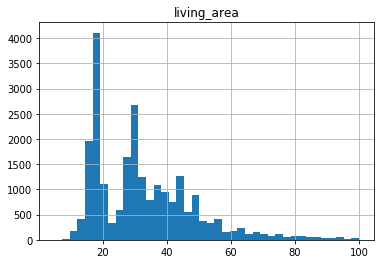

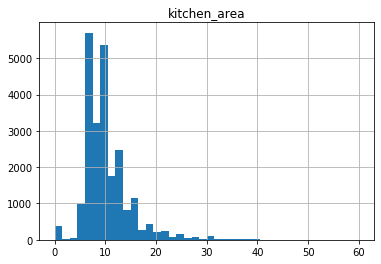

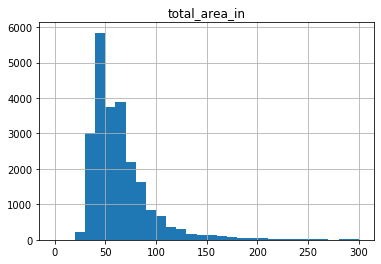

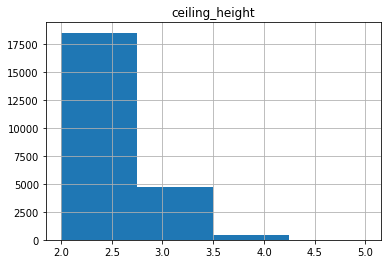

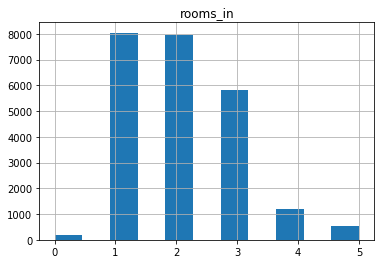

In [4]:
<div style="border:solid  orange  2px; padding: 20px"> <h1 style="color: orange ; margin-bottom:20px">Комментарий наставника</h1>

Всё верно, но лучше делить код на маленькие законченные куски, а все пояснения писать не комментариями, а в специальных markdown ячейках# Посмотрим на наши данные на графиках
kv.hist(column = 'living_area', bins=40, range = (5, 100))
kv.hist(column = 'kitchen_area', bins=40, range = (0, 60))
kv.hist(column = 'total_area_in', bins=30, range = (0, 300))
kv.hist(column = 'ceiling_height', bins=4, range = (2, 5))
kv.hist(column = 'rooms_in', bins=11, range = (0, 5))

In [5]:
# создадим таблицу с данными по дому и окружению - dom
dom = data.loc[:, ['id', 'floor', 'floors_total', 'locality_name', 'airports_nearest', 'cityCenters_nearest',
       'parks_around3000', 'parks_nearest', 'ponds_around3000', 'ponds_nearest',]]

# floors_total - неизвестные этажи - удаляем
dom.dropna(subset = ['floors_total'], inplace = True)
          
#not_nan, заменяем все возможные численные значения на int , игнорим - названия населенных пунктов в таблице(dom)
dom = dom.fillna(0).astype(int, errors = 'ignore')
dom['locality_name']= dom['locality_name'].fillna('-')

# работаем с названиями - пару локаций было задвоено
dom['locality_name'] = dom['locality_name'].replace('Мурино', 'посёлок Мурино')
dom['locality_name'] = dom['locality_name'].replace('Кудрово', 'деревня Кудрово')

# мой метод округления расстояния до центра до 500 метров. # дальше, где мы будем искать зависимость цены от расстояния,
#при округлении до 0.5 км график будет точнее чем при округлении до 1 км
dom['cityCenters_nearest_in'] = dom['cityCenters_nearest'].apply(lambda x: ((x+500) // 500) * 500)


# третья таблица - таблица данных ads
ads = data.loc[:, ['id', 'first_day_exposition', 'days_exposition', 'total_images']]

#days_exposition - заменим пропущенные значения заведомо невозможным значением, отсутствие данных объясняет то , что
#объявление еще размещается и не закрыто.
ads['days_exposition'] = ads['days_exposition'].fillna(-1)

# округлим дни продаж до месяцев
ads['month_sell'] = ads['days_exposition'] // 30

<div style="border:solid  green  2px; padding: 20px"> <h1 style="color: green ; margin-bottom:20px">Комментарий наставника</h1>

Вся требуемая предобработка выполнена, всё логично и точно, продолжай в том же духе!)


# Шаг 3. Посчитайте и добавьте в таблицу

In [6]:
#заменим типы данных там где это нужно
kv[['total_area', 'last_price', 'kitchen_area', 'balcony', 'living_area', 
    'total_area_in', 'living_area_in']] = kv[['total_area', 'last_price', 
    'kitchen_area', 'balcony', 'living_area', 'total_area_in', 'living_area_in']].astype(int)

# создадим новый столбец - цена за метр и округлим его до сотых
kv['cena_metr'] = (kv['last_price'] / kv['total_area_in']).round(-2)
kv['cena_metr_in'] = kv['cena_metr'].round(-2)
#print(kv['cena_metr_in'].value_counts().sort_value())
#.plot(bins=18, range = (0, 300000))

# соотношение жилой площади к общей
kv['living_total'] = kv['living_area'] / kv['total_area']

# соотношение кухни к общей площади
kv['kitchen_total'] = kv['kitchen_area'] / kv['total_area']

# Сводная таблица по Квартира
kvartira  = kv.query('cena_metr < 250000').pivot_table(index = 'rooms', 
                                                       values = ['total_area_in', 'living_area', 'kitchen_area', 'last_price', 
                                                      'cena_metr', 'living_total', 'kitchen_total',
                                                     ])
display(np.round(kvartira, 2))
kvartira1 = kv.pivot_table(index = 'rooms', 
                                                       values = ['total_area_in', 'living_area', 'kitchen_area', 'last_price', 
                                                      'cena_metr_in', 'living_total', 'kitchen_total',
                                                     ])
#display(np.round(kvartira1, 2))

#Добавляем в таблицу строки с месяцем годом и днем выставления объявления.
ads['first_day_exposition'] = pd.to_datetime(ads['first_day_exposition'], format='%Y-%m-%dT%H:%M:%S')
ads['month'] = pd.DatetimeIndex(ads['first_day_exposition']).month
ads['year'] = pd.DatetimeIndex(ads['first_day_exposition']).year
ads['day'] = pd.DatetimeIndex(ads['first_day_exposition']).dayofweek

# создадим столбец чтобы показать в какой день квартиры чаще всего уходят с продажи
ads['day_sell'] = ads.apply(lambda row: (row['days_exposition'] % 7 + row['day']) % 7, axis=1).astype(int)

# разберемся с этажами, добавим столбец с вариантами - 1 , 2 или 3
dom['floors_var'] = dom.apply(etag, axis=1)




# пора объеденить 3 таблицы - в табилцу ex
ex = dom.join(kv.set_index('id'),  on='id')
ex = ex.join(ads.set_index('id'))

# создадим срезы таблицы по питеру и по области
ex_bez_Pitera = ex.query('locality_name != "Санкт-Петербург"')
ex_Piter = ex.query('locality_name == "Санкт-Петербург" and cityCenters_nearest_in > 1')

,cena_metr,kitchen_area,kitchen_total,last_price,living_area,living_total,total_area_in
rooms,,,,,,,
0,111022.96,0.00,0.00,3325166.58,18.68,0.69,29.08
1,100712.26,9.41,0.25,3782120.00,17.84,0.49,37.54
2,94311.05,9.66,0.17,5371106.21,31.61,0.58,55.26
3,92060.24,10.64,0.14,7414405.38,47.06,0.63,76.93
4,98741.59,12.14,0.12,10858609.47,64.81,0.65,103.85
5,103523.92,14.83,0.10,17163849.44,96.48,0.64,155.08
6,109727.84,17.70,0.10,21836957.98,128.40,0.68,194.33
7,120461.82,17.00,0.08,32031528.65,163.44,0.65,253.45
8,104270.00,16.30,0.07,27269000.00,154.50,0.63,254.00


<div style="border:solid  green  2px; padding: 20px"> <h1 style="color: green ; margin-bottom:20px">Комментарий наставника</h1>

Всё посчитано верно и добавлено в таблицу, продолжай в том же духе)

### Шаг 4. Проведите исследовательский анализ данных и выполните инструкции:

В среднем процесс продажи квартиры длится  по медиане- 2 месяца
В среднем процесс продажи квартиры длится  по среднему - 4 месяца


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f91b20110d0>]],
      dtype=object)

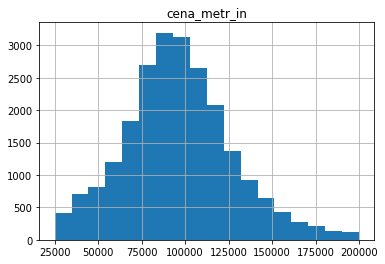

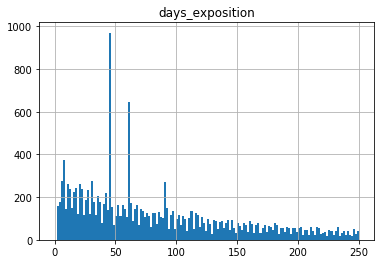

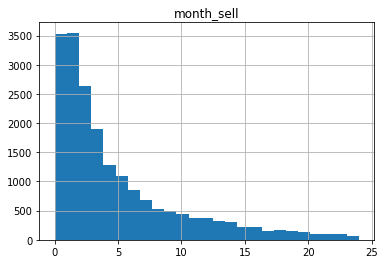

In [7]:
print('В среднем процесс продажи квартиры длится  по медиане-', ex['month_sell'].median().astype(int), 'месяца')
print('В среднем процесс продажи квартиры длится  по среднему -', ex['month_sell'].mean().astype(int), 'месяца')

ex.hist(column = 'cena_metr_in', bins=18, range = (25000, 200000))
ex.hist(column = 'days_exposition', bins=150, range = (0, 250))
ex.hist(column = 'month_sell', bins=25, range = (0, 24))
#kv.hist(column = 'kitchen_area', bins=18, range = (8, 40))

<div style="border:solid orange 2px; padding: 20px"> <h1 style="color:orange; margin-bottom:20px">Комментарий наставника</h1>

Не забывай подписывать оси на графиках и сам график, иначе не залазя в код абсолютно не понятно, что изображено

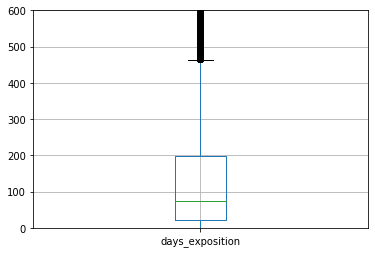

In [8]:
plt.ylim(0, 600)
ex.boxplot(column = 'days_exposition')

Рассмотрим распределение цен на однокомнатную квартиру - в центре Санкт-Петербурга, за пределами 8000 от цента и в области


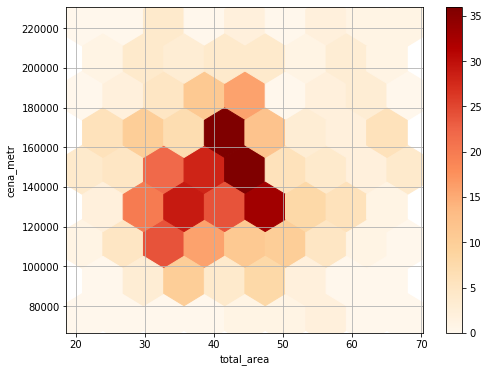

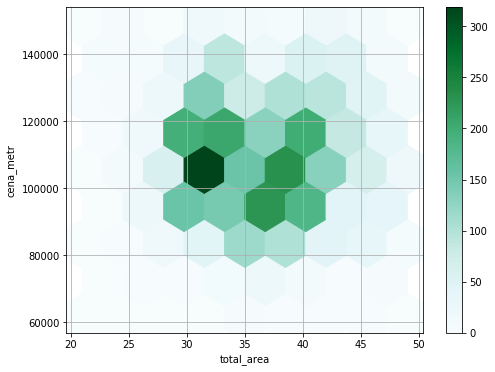

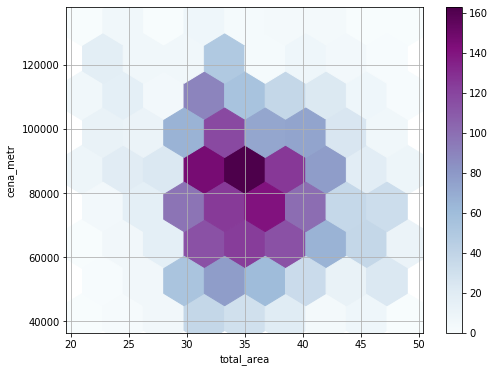

In [9]:
print('Рассмотрим распределение цен на однокомнатную квартиру - в центре Санкт-Петербурга, за пределами 8000 от цента и в области')
ex_Piter.query('rooms <= 1 and 20 < total_area < 70 and 70000 < cena_metr < 225000 and cityCenters_nearest_in < 8000').plot(x='total_area',
                                                            y='cena_metr', kind='hexbin', gridsize=8, cmap="OrRd",
                                                            figsize=(8, 6), label= 'Санкт_Петербург', sharex=False, grid=True)
ex_Piter.query('rooms <= 1 and 20 < total_area < 50 and 60000 < cena_metr < 150000 and cityCenters_nearest_in > 8000').plot(x='total_area',
                                                            y='cena_metr', kind='hexbin', gridsize=8, 
                                                            figsize=(8, 6), label= 'Санкт_Петербург', sharex=False, grid=True)
ex_bez_Pitera.query('rooms <= 1 and 20 < total_area < 50 and 40000 < cena_metr < 135000').plot(x='total_area',
                                                            y='cena_metr', kind='hexbin', gridsize=8, 
                                                            figsize=(8, 6), label= 'Область', cmap="BuPu",
                                                            sharex=False, grid=True)

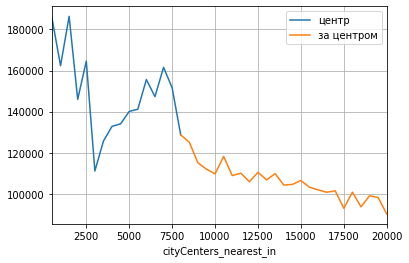

In [10]:
# создадим два среза , до 8 и после 8 тысяч метров. Провал в цене с середине скорей всего означает промышленое кольцо 
#где цена за метр ниже
d04000 = ex_Piter.query('0<= cityCenters_nearest <8000').pivot_table(index="cityCenters_nearest_in",
                                                                values='cena_metr_in', aggfunc='mean')
d04000['cityCenters_nearest_in'] = d04000.index.values
posle4000 = ex_Piter.query('7500<= cityCenters_nearest <20000').pivot_table(index="cityCenters_nearest_in",
                                                                values='cena_metr_in', aggfunc='mean')
posle4000['cityCenters_nearest_in'] = posle4000.index.values

ax = d04000.plot(x = 'cityCenters_nearest_in', y='cena_metr_in', label='центр')
posle4000.plot(x = 'cityCenters_nearest_in', y='cena_metr_in', ax=ax, grid=True, label='за центром', legend=True)


AxesSubplot(0.125,0.125;0.775x0.755)


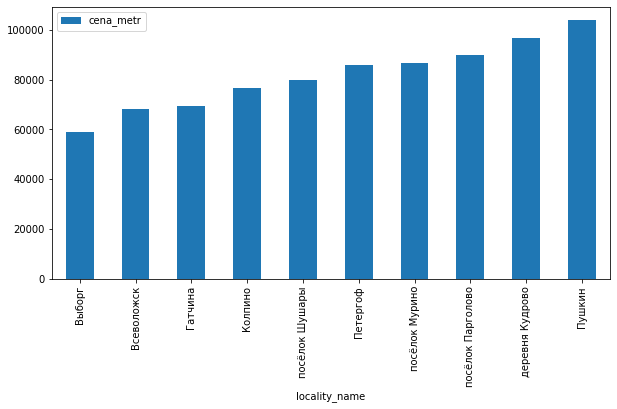

In [11]:
# цена в пригородах, выбираем 10 самых популярных областных городов.
name = ex_bez_Pitera['locality_name'].value_counts().head(10).index
cena_prigorod = (
    ex_bez_Pitera.query('locality_name in @name').pivot_table(index = 'locality_name',
    values='cena_metr').sort_values(by = 'cena_metr').plot(y ='cena_metr', kind='bar', figsize = (10, 5))
)
print(cena_prigorod)

<div style="border:solid  green  2px; padding: 20px"> <h1 style="color: green ; margin-bottom:20px">Комментарий наставника</h1>

Верно

In [12]:
# Сводная таблица по центру Питера
ex_Piter_centr_centr = ex_Piter.query('cityCenters_nearest_in < 2500')
centr  = (ex_Piter_centr_centr.pivot_table(index = 'rooms', 
        values = ['total_area_in', 'living_area', 'kitchen_area', 'last_price', 
        'cena_metr','ceiling_height'])
         )
display(np.round(centr, 2))

,ceiling_height,cena_metr,kitchen_area,last_price,living_area,total_area_in
rooms,,,,,,
0,4.00,117100.00,0.00,8200000.00,68.00,70.00
1,2.87,209378.05,10.78,8007843.88,21.41,40.73
2,2.94,176464.49,12.64,14521700.15,38.27,70.09
3,3.00,160015.38,13.18,17757756.41,55.08,94.87
4,3.05,164920.97,13.60,23554645.16,80.23,123.23
5,3.09,183966.67,15.17,36224600.00,118.47,173.33
6,2.95,136369.23,18.23,25816384.62,126.85,177.69
7,3.09,163745.45,19.82,48695825.09,191.82,300.91
8,3.17,109900.00,18.00,24430000.00,151.67,223.33


In [14]:
# корреляции
print('Коэффициент корреляции Пирсона')
correlac = (ex_Piter.query('1 < cityCenters_nearest_in < 20000 and 50000 <cena_metr_in < 300000')
       .pivot_table(index = 'cityCenters_nearest_in', values = 'cena_metr_in', aggfunc='mean')
      )
correlac['svaz'] = correlac.index.values
print('Между расстоянием от центра и ценой:', correlac['cena_metr_in'].corr(correlac['svaz']))

correlac = (ex_Piter.query('1 < cityCenters_nearest_in < 20000 and 50000 <cena_metr_in < 300000 and rooms < 5')
       .pivot_table(index = 'rooms_in', values = 'cena_metr_in', aggfunc='mean')
      )
correlac['svaz'] = correlac.index.values
print('Между комнатами и ценой:', correlac['cena_metr_in'].corr(correlac['svaz']))

correlac = ex_Piter.pivot_table(index = 'floors_var', values = 'cena_metr_in', aggfunc='mean')
correlac['svaz'] = correlac.index.values
print('Между этажем и ценой:', correlac['cena_metr_in'].corr(correlac['svaz']))

correlac = (ex_Piter.query('10 < total_area_in < 250 and 50000 <cena_metr_in < 300000')
       .pivot_table(index = 'total_area_in', values = 'cena_metr_in', aggfunc='mean')
      )
correlac['svaz'] = correlac.index.values
print('Между площадью и ценой:', correlac['cena_metr_in'].corr(correlac['svaz']))


correlac = (ex_Piter.query('50000 <cena_metr_in < 300000')
       .pivot_table(index = 'year', values = 'cena_metr_in', aggfunc='mean')
      )
correlac['svaz'] = correlac.index.values
print('Между годом и ценой:', correlac['cena_metr_in'].corr(correlac['svaz']))


correlac = (ex_Piter.query('50000 <cena_metr_in < 300000')
       .pivot_table(index = 'month', values = 'cena_metr_in', aggfunc='mean')
      )
correlac['svaz'] = correlac.index.values
print('Между месяцем размещения и ценой:', correlac['cena_metr_in'].corr(correlac['svaz']))


correlac = (ex_Piter.pivot_table(index = 'day', values = 'cena_metr_in', aggfunc='mean')
      )
correlac['svaz'] = correlac.index.values
print('Между днем размещения и ценой:', correlac['cena_metr_in'].corr(correlac['svaz']))


Коэффициент корреляции Пирсона
Между расстоянием от центра и ценой: -0.8756923208004798
Между комнатами и ценой: -0.9141973359602532
Между этажем и ценой: 0.8819902410969596
Между площадью и ценой: 0.4246483334846669
Между годом и ценой: -0.2814106876613921
Между месяцем размещения и ценой: -0.40119881895355797
Между днем размещения и ценой: 0.1200207166370963


In [15]:
# корреляции для центра
print('Коэффициент корреляции Пирсона для центра города')


correlac1 = (ex_Piter_centr_centr.pivot_table(index = 'cityCenters_nearest_in', values = 'cena_metr_in', aggfunc='mean')
      )
correlac1['svaz'] = correlac1.index.values
print('Между расстоянием от центра и ценой:', correlac1['cena_metr_in'].corr(correlac1['svaz']))

correlac2 = (ex_Piter_centr_centr.pivot_table(index = 'rooms', values = 'cena_metr_in', aggfunc='mean')
      )
correlac2['svaz'] = correlac2.index.values
print('Между комнатами и ценой:', correlac2['cena_metr_in'].corr(correlac2['svaz']))

correlac1 = ex_Piter_centr_centr.pivot_table(index = 'floors_var', values = 'cena_metr_in', aggfunc='mean')
correlac1['svaz'] = correlac1.index.values
print('Между этажем и ценой:', correlac1['cena_metr_in'].corr(correlac1['svaz']))

correlac1 = (ex_Piter_centr_centr.pivot_table(index = 'total_area_in', values = 'cena_metr_in', aggfunc='mean')
      )
correlac1['svaz'] = correlac1.index.values
print('Между площадью и ценой:', correlac1['cena_metr_in'].corr(correlac1['svaz']))


correlac1 = (ex_Piter_centr_centr.pivot_table(index = 'year', values = 'cena_metr_in', aggfunc='mean')
      )
correlac1['svaz'] = correlac1.index.values
print('Между годом и ценой:', correlac1['cena_metr_in'].corr(correlac1['svaz']))


correlac1 = (ex_Piter_centr_centr.pivot_table(index = 'month', values = 'cena_metr_in', aggfunc='mean')
      )
correlac1['svaz'] = correlac1.index.values
print('Между месяцем размещения и ценой:', correlac1['cena_metr_in'].corr(correlac1['svaz']))


correlac1 = (ex_Piter_centr_centr.pivot_table(index = 'day', values = 'cena_metr_in', aggfunc='mean')
      )
correlac1['svaz'] = correlac1.index.values
print('Между днем размещения и ценой:', correlac1['cena_metr_in'].corr(correlac1['svaz']))



Коэффициент корреляции Пирсона для центра города
Между расстоянием от центра и ценой: -0.6257743232825765
Между комнатами и ценой: -0.1313302150212117
Между этажем и ценой: 0.5293498787284077
Между площадью и ценой: 0.07032669900041857
Между годом и ценой: -0.42597433688345127
Между месяцем размещения и ценой: -0.09573661236714578
Между днем размещения и ценой: -0.5618111842935545


<div style="border:solid  green  2px; padding: 20px"> <h1 style="color: green ; margin-bottom:20px">Комментарий наставника</h1>

У тебя отлично получается анализировать сложные данные и находить скрытые зависимости, здорово!)

### Шаг 5. Общий вывод

Бесконечное количество данных, которые можно связывать с друг другом бесконечное количество раз. Корреляция сильно меняется при изменении выборки - расстояние от центра.Так же есть различия при общих данных и при выборке в центре - видимо там покупателям не сильно важен этаж и площадь, главное быть в центре событий. Жилье в Питере дорогое, но на расстоянии в 2,5 - 5 километров можно найти подешевле, наверное там пром зоны или далеко находиться метро.

<div style="border:solid orange 2px; padding: 20px"> <h1 style="color:orange; margin-bottom:20px">Комментарий наставника</h1>

Общий вывод в будущем стоит писать подробнее, а так же приводить цифры полученные в ходе выполнения проекта

### Чек-лист готовности проекта

Поставьте 'x' в выполненных пунктах. Далее нажмите Shift+Enter.

- [x]  открыт файл
- [x]  файлы изучены (выведены первые строки, метод info())
- [x]  определены пропущенные значения
- [x]  заполнены пропущенные значения
- [x]  есть пояснение, какие пропущенные значения обнаружены
- [x]  изменены типы данных
- [x]  есть пояснение, в каких столбцах изменены типы и почему
- [x]  посчитано и добавлено в таблицу: цена квадратного метра
- [x]  посчитано и добавлено в таблицу: день недели, месяц и год публикации объявления
- [x]  посчитано и добавлено в таблицу: этаж квартиры; варианты — первый, последний, другой
- [x]  посчитано и добавлено в таблицу: соотношение жилой и общей площади, а также отношение площади кухни к общей
- [x]  изучены следующие параметры: площадь, цена, число комнат, высота потолков
- [x]  построены гистограммы для каждого параметра
- [x]  выполнено задание: "Изучите время продажи квартиры. Постройте гистограмму. Посчитайте среднее и медиану. Опишите, сколько обычно занимает продажа. Когда можно считать, что продажи прошли очень быстро, а когда необычно долго?"
- [x]  выполнено задание: "Уберите редкие и выбивающиеся значения. Опишите, какие особенности обнаружили."
- [x]  выполнено задание: "Какие факторы больше всего влияют на стоимость квартиры? Изучите, зависит ли цена от квадратного метра, числа комнат, этажа (первого или последнего), удалённости от центра. Также изучите зависимость от даты размещения: дня недели, месяца и года. "Выберите 10 населённых пунктов с наибольшим числом объявлений. Посчитайте среднюю цену квадратного метра в этих населённых пунктах. Выделите населённые пункты с самой высокой и низкой стоимостью жилья. Эти данные можно найти по имени в столбце '*locality_name'*. "
- [x]  выполнено задание: "Изучите предложения квартир: для каждой квартиры есть информация о расстоянии до центра. Выделите квартиры в Санкт-Петербурге (*'locality_name'*). Ваша задача — выяснить, какая область входит в центр. Создайте столбец с расстоянием до центра в километрах: округлите до целых значений. После этого посчитайте среднюю цену для каждого километра. Постройте график: он должен показывать, как цена зависит от удалённости от центра. Определите границу, где график сильно меняется — это и будет центральная зона. "
- [x]  выполнено задание: "Выделите сегмент квартир в центре. Проанализируйте эту территорию и изучите следующие параметры: площадь, цена, число комнат, высота потолков. Также выделите факторы, которые влияют на стоимость квартиры (число комнат, этаж, удалённость от центра, дата размещения объявления). Сделайте выводы. Отличаются ли они от общих выводов по всему городу?"
- [x]  в каждом этапе есть выводы
- [x]  есть общий вывод

<div style="border:solid  green  2px; padding: 20px">

<h1 style="color: green ; margin-bottom:20px">Комментарий наставника</h1>

#### Код

Всё отлично. Из того, что очень порадовало - соблюдена структура проекта, шаги из задания обозначены и выполнены последовательно, код написан аккуратно, используются комментарии к коду, быстро можно понять, какие операции выполняют сложные конструкции. В качестве совета предлагаю глубже изучить библиотеку Seaborn для построения более ярких и качественных визуализаций в Python, так как иногда хорошая красочная визуализация может сказать очень многое о данных.

#### Выводы

Ты пишешь отличные обоснованные выводы по проделанной раблоте и выдвигаешь корректные гипотезы - это очень радует!) Так же видно глубокое понимание проведённого анализа. Было очень интересно проверять твой проект и следить за твоей мыслью, продолжай в том же духе) Удачи!)

<div style="border:solid  green  2px; padding: 20px">

<h1 style="color: green ; margin-bottom:20px">Комментарий наставника</h1>

Работа принята!) Удачи на следующих этапах, у тебя всё получится, только не сомневайся в себе и старательно подходи ко всем вопросам)